In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("benroshan/online-food-delivery-preferencesbangalore-region")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\Shree\.cache\kagglehub\datasets\benroshan\online-food-delivery-preferencesbangalore-region\versions\3


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
df=pd.read_csv(f"{path}/onlinedeliverydata.csv")

In [4]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [6]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [7]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [8]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [9]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,...,Slightly Important,Unimportant,Slightly Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Slightly Important,Yes,Nil


In [13]:
df.duplicated().sum()

np.int64(102)

In [14]:
df.isna()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


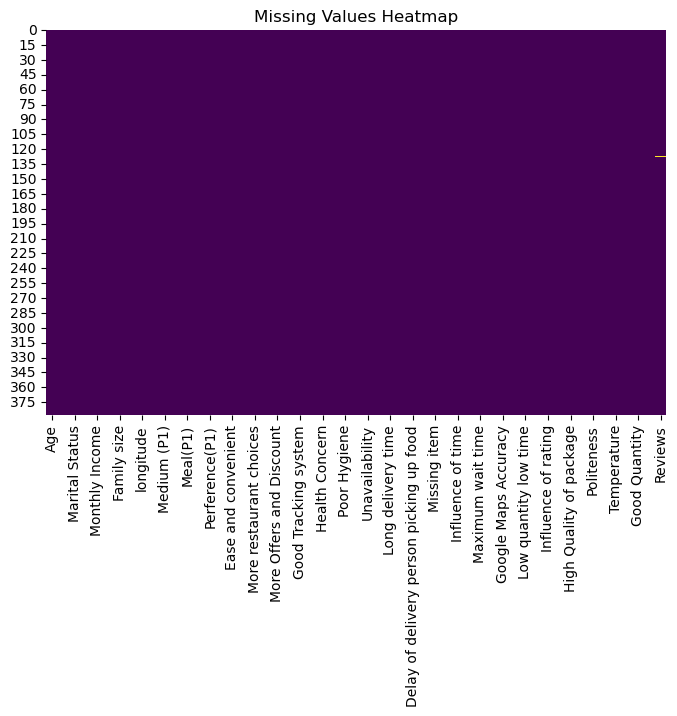

In [12]:
# 1. Check missing values

plt.figure(figsize=(8,5))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_7548\1126772171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set2")


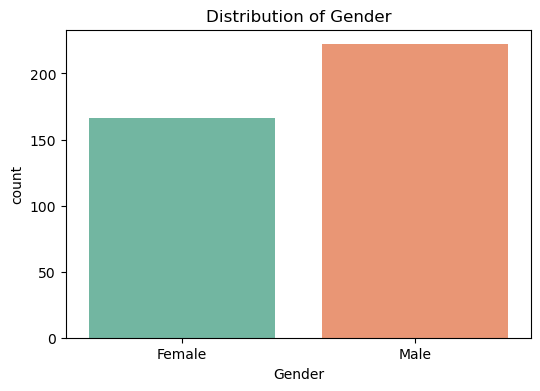

C:\Users\Shree\AppData\Local\Temp\ipykernel_7548\1126772171.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age", palette="Set1")


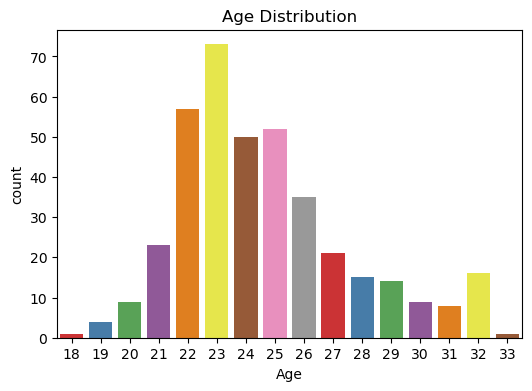

In [18]:
# 2. Countplot for categorical column (example: 'Age', 'Gender')

if "Gender" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Gender", palette="Set2")
    plt.title("Distribution of Gender")
    plt.show()

    
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Age", palette="Set1")
    plt.title("Age Distribution")
    plt.show()



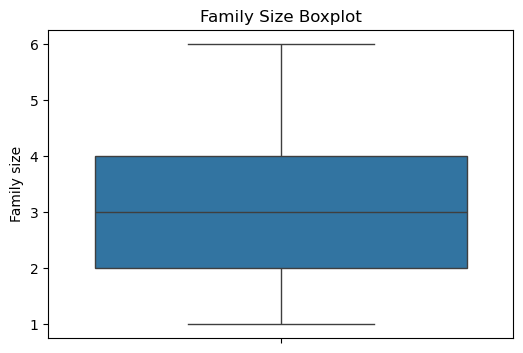

In [19]:
if "Family size" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df["Family size"])
    plt.title("Family Size Boxplot")
    plt.show()

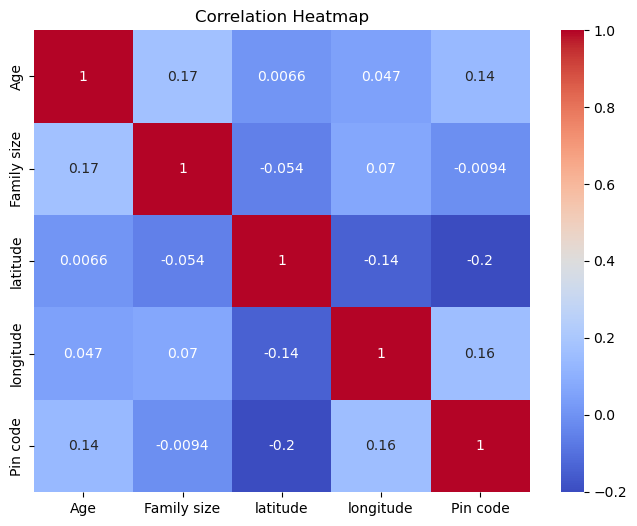

In [20]:
# 4. Correlation heatmap (numerical columns only)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


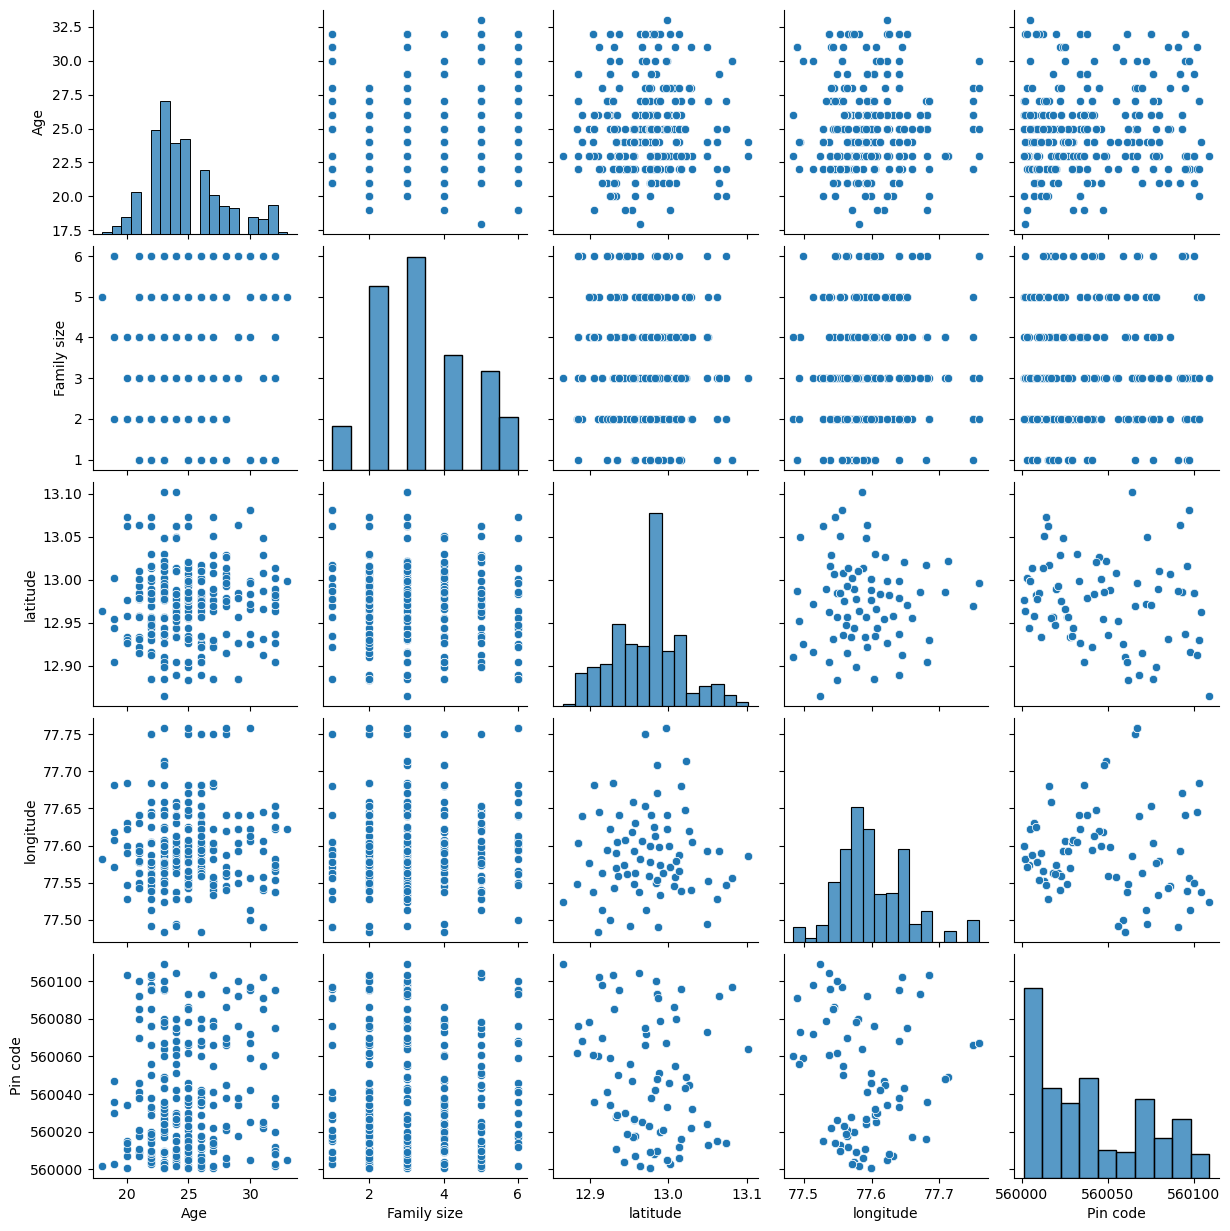

In [21]:
# 5. Pairplot for numerical columns
sns.pairplot(df.select_dtypes(include=["int64","float64"]))
plt.show()


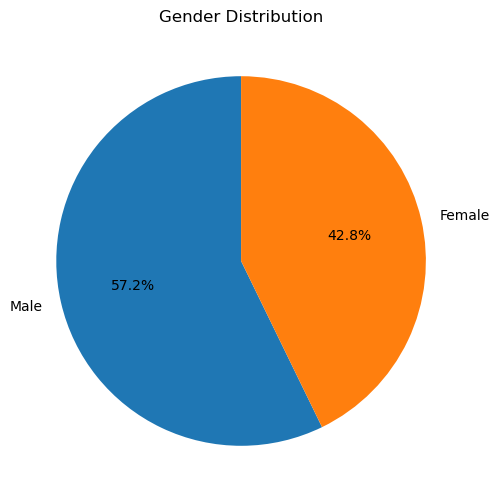

In [22]:
if "Gender" in df.columns:
    plt.figure(figsize=(6,6))
    df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
    plt.title("Gender Distribution")
    plt.ylabel("")
    plt.show()



In [23]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [24]:
# Features (X) and Target (y)
X = df.drop("Output", axis=1)   # all columns except Output
y = df["Output"]                # target column



In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Train Model (Rando Foremst)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
# Predictions
y_pred = model.predict(X_test)



In [28]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Accuracy: 0.9615384615384616
Training set shape: (310, 54) (310,)
Testing set shape: (78, 54) (78,)


In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


In [30]:
print(classification_report(y_test,y_pred),'😱')

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.96      1.00      0.98        66

    accuracy                           0.96        78
   macro avg       0.98      0.88      0.92        78
weighted avg       0.96      0.96      0.96        78
 😱


In [31]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression
Accuracy: 0.8846153846153846
[[ 7  5]
 [ 4 62]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78



C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree
Accuracy: 0.8974358974358975
[[10  2]
 [ 6 60]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.97      0.91      0.94        66

    accuracy                           0.90        78
   macro avg       0.80      0.87      0.83        78
weighted avg       0.92      0.90      0.90        78



In [33]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("🔹 AdaBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print(confusion_matrix(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))


🔹 AdaBoost
Accuracy: 0.9487179487179487
[[10  2]
 [ 2 64]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.97      0.97      0.97        66

    accuracy                           0.95        78
   macro avg       0.90      0.90      0.90        78
weighted avg       0.95      0.95      0.95        78



In [34]:
svm_model = SVC()
# fitting the model
svm_model.fit(X_train, y_train)
# predict
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print(confusion_matrix(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.85      1.00      0.92        66

    accuracy                           0.85        78
   macro avg       0.42      0.50      0.46        78
weighted avg       0.72      0.85      0.78        78

Accuracy: 0.9487179487179487
[[10  2]
 [ 2 64]]


C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


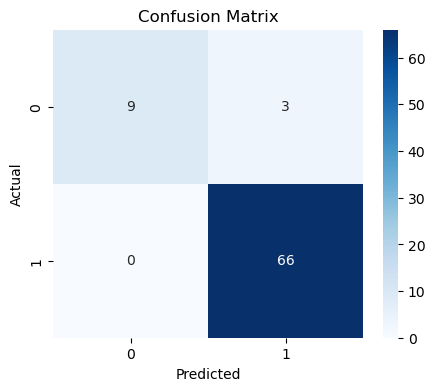

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
# Step: Create and train the Gradient Boosting model
model = GradientBoostingClassifier(
    n_estimators=150,     # Number of boosting stages
    learning_rate=0.1,    # Step size shrinkage
    max_depth=5,          # Max depth of each tree
    random_state=42
)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.94      0.97      0.96        66

    accuracy                           0.92        78
   macro avg       0.87      0.82      0.84        78
weighted avg       0.92      0.92      0.92        78

Confusion Matrix:
 [[ 8  4]
 [ 2 64]]
